In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier

In [11]:
hr = pd.read_csv('D:/dataset/HR Analytics.csv')
hr_dummies = pd.get_dummies(hr)


train, test = train_test_split(hr_dummies,
                               test_size=0.3,
                               random_state=100)

In [12]:
    train_x=train.drop('Attrition',axis=1)
    train_y=train['Attrition']

    test_x=test.drop('Attrition',axis=1)
    test_y=test['Attrition']

## Algorithm steps
- Identify Euclidean Distance between thetest sample with all the training samples.
- sort the training samples in the ascending order of Euclidean distance 
- choose k-Neighbours i.e choose 1st k rows after sorting
- Do polling on target col
- Prediction will be for that class which has the highest count.

In [28]:
from scipy.spatial.distance import euclidean

test_sample=test_x.iloc[0]
df_eds=pd.DataFrame(columns=['index','euclidean'])

for index, row in train_x.iterrows():
    curr_ed=euclidean(test_sample.values, row.values)
    df_eds=df_eds.append({'index':index, 'euclidean':curr_ed},ignore_index=True)
df_eds=df_eds.sort_values(by='euclidean')
df_eds.head()

,index,euclidean
185,1136.0,543.498850
976,1077.0,544.885309
550,853.0,586.559460
783,833.0,661.422709
696,658.0,682.539376


In [29]:
test_sample

Age                                    32
DailyRate                             116
DistanceFromHome                       13
Education                               3
EmployeeCount                           1
EmployeeNumber                       1234
EnvironmentSatisfaction                 3
HourlyRate                             77
JobInvolvement                          2
JobLevel                                1
JobSatisfaction                         2
MonthlyIncome                        2743
MonthlyRate                          7331
NumCompaniesWorked                      1
PercentSalaryHike                      20
PerformanceRating                       4
RelationshipSatisfaction                3
StandardHours                          80
StockOptionLevel                        1
TotalWorkingYears                       2
TrainingTimesLastYear                   2
WorkLifeBalance                         3
YearsAtCompany                          2
YearsInCurrentRole                

In [25]:
neighbour=df_eds.head()
train_y.loc[neighbour['index']]#.value_counts().index[0]

1136.0    1
1077.0    1
853.0     0
833.0     0
658.0     0
Name: Attrition, dtype: int64

Accuracy:0.798
             precision    recall  f1-score   support

          0       0.84      0.94      0.89       371
          1       0.15      0.06      0.08        70

avg / total       0.73      0.80      0.76       441



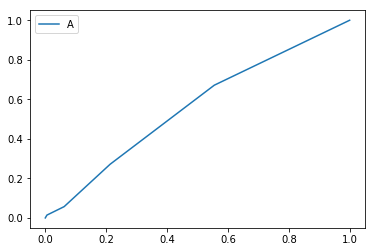

In [33]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=5)
model.fit(train_x,train_y)
pred_class=model.predict(test_x)
pred_prob=pd.DataFrame(model.predict_proba(test_x),columns=['Neg','Pos'])
print('Accuracy:%.3f'%accuracy_score(test_y,pred_class))
print(classification_report(test_y,pred_class))

fpr,tpr,thresholds=roc_curve(test_y,pred_prob['Pos'])
auc_knn=auc(fpr,tpr)
plt.plot(fpr,tpr)
plt.legend("AUC:%.2f"%auc_knn)

## Hyper Parameter Turning

In [41]:
from sklearn.tree import DecisionTreeClassifier

depths=[]
test_errors=[]
train_errors=[]

for depth in range(1,30):
    model=DecisionTreeClassifier(max_depth=depth)
    model.fit(train_x,train_y)

    pred_train=model.predict(train_x)
    pred_test=model.predict(test_x)

    train_error=1-accuracy_score(train_y,pred_train)
    test_error=1- accuracy_score(test_y,pred_test)

    depths.append(depth)
    test_errors.append(test_error)
    train_errors.append(train_error)

Text(0,0.5,'Error rate')

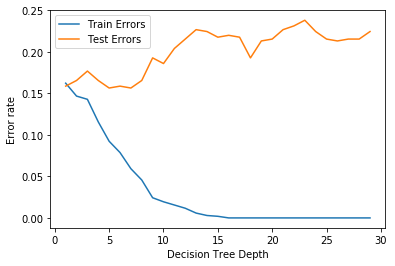

In [45]:
plt.plot(depths,train_errors)
plt.plot(depths,test_errors)
plt.legend(['Train Errors','Test Errors'])
plt.xlabel('Decision Tree Depth')
plt.ylabel('Error rate')

## Cross Validation

In [46]:
from sklearn.model_selection import cross_val_score

model=DecisionTreeClassifier(random_state=100,max_depth=1)
cv_results=cross_val_score(model,train_x,train_y,cv=10)
cv_results

array([0.83653846, 0.83653846, 0.83495146, 0.83495146, 0.82524272,
       0.83495146, 0.83495146, 0.83333333, 0.84313725, 0.81372549])

In [51]:
print(cv_results.mean())
print(cv_results.var())

0.795823998008464
0.0005487709994292361


In [55]:
depths=[]
errors=[]

for depth in range(1,30):
    model=DecisionTreeClassifier(random_state=100,max_depth=depth)
    cv_results=cross_val_score(model,train_x,train_y,cv=10)
    avg_error=np.mean([1-acc for acc in cv_results])
    depths.append(depth)
    errors.append(avg_error)

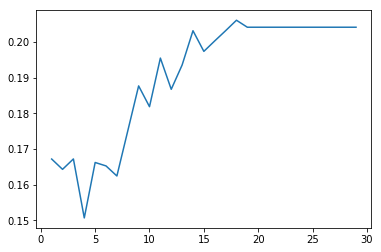

In [57]:
plt.plot(depths,errors)

## Grid Search CV

In [66]:
from sklearn.model_selection import GridSearchCV

params={'max_depth':list(range(1,30)),'criterion':['gini','entropy']}
base_estimator=DecisionTreeClassifier(random_state=100)
cv_model=GridSearchCV(base_estimator,param_grid=params,cv=10,scoring='f1')
cv_model.fit(train_x,train_y)


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\m

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [68]:
cv_model.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [69]:
#cv_model.grid_scores_
list(zip(cv_model.cv_results_['params'],cv_model.cv_results_['mean_test_score']))

[({'criterion': 'gini', 'max_depth': 1}, 0.07913620934916409),
 ({'criterion': 'gini', 'max_depth': 2}, 0.23385725679061056),
 ({'criterion': 'gini', 'max_depth': 3}, 0.2760639710188038),
 ({'criterion': 'gini', 'max_depth': 4}, 0.327134955549247),
 ({'criterion': 'gini', 'max_depth': 5}, 0.30980476593165884),
 ({'criterion': 'gini', 'max_depth': 6}, 0.3572012846602346),
 ({'criterion': 'gini', 'max_depth': 7}, 0.381657563593007),
 ({'criterion': 'gini', 'max_depth': 8}, 0.3836105356083092),
 ({'criterion': 'gini', 'max_depth': 9}, 0.3655887753210776),
 ({'criterion': 'gini', 'max_depth': 10}, 0.3947536876892029),
 ({'criterion': 'gini', 'max_depth': 11}, 0.37539488983695696),
 ({'criterion': 'gini', 'max_depth': 12}, 0.41088210794521884),
 ({'criterion': 'gini', 'max_depth': 13}, 0.396175000080295),
 ({'criterion': 'gini', 'max_depth': 14}, 0.3762545686976288),
 ({'criterion': 'gini', 'max_depth': 15}, 0.4052999637290497),
 ({'criterion': 'gini', 'max_depth': 16}, 0.39879628619124413)